In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp

### Now we train another neural network for z and $D_L(z)$

In [2]:
# file2 = '/home/isidro/Documents/gitHub/misRepos/neuralCosmoReconstruction/data/jla_binned_distances_31nodes_v1.txt'
file2 = '/home/cosmocicatais/Documents/github/neuralCosmoReconstruction/data/jla_binned_distances_31nodes_v1.txt'
data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
# print(data.head(31))
# data.head(31) 
# plt.savefig("DistbinnedJLA.png")

In [3]:
shuffle = [x for x in range(len(data.values)) if x%2 == 0]
comp = [x for x in range(len(data.values)) if x%2 ==1]
shuffle.extend(comp)

data = data.values[shuffle]
# data

In [4]:
z = data[:,0]
dl = data[:,1:]

In [5]:
# scalerz = StandardScaler()
# # scalerz = MinMaxScaler(feature_range=(-1,1))
# # fit scaler on data
# scalerz.fit(z.reshape(-1,1))
# # apply transform
# z = scalerz.transform(z.reshape(-1,1))

In [6]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]
# scalerz = StandardScaler()
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))
scalerdl = StandardScaler()
scalerdl.fit(dl.reshape(-1, 1))
dll = scalerdl.transform(dl.reshape((-1,1)))
z_train, z_test = np.split(z, indx)
dl_train, dl_test = np.split(dll, indx)

In [7]:
# scalerdl.inverse_transform(dl_train.reshape(-1,1))
z_train

array([0.01      , 0.01383342, 0.01913635, 0.02647212, 0.03661999,
       0.05065797, 0.0700773 , 0.09694087, 0.13410237, 0.18550944,
       0.25662299, 0.35499736, 0.49108275, 0.67933539, 0.93975316,
       1.3       , 0.01176156, 0.01627025, 0.02250733, 0.03113533,
       0.04307081, 0.05958165, 0.08242181, 0.11401754])

In [8]:
# callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
#                                    min_delta=0.0,
#                                    patience=100,
#                                    restore_best_weights=True)]

In [9]:
def model(input_z):
    efirst = Dense(100, activation='relu', input_shape=(1,))(input_z)
    x = Dense(100, activation='relu')(efirst)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)

    elast = Dense(1, activation='linear')(x)
    return elast

batch_size = 1
# epochs = 2000
epochs = 1000
input_z = Input(shape = (1,))
neural_model = Model(input_z, model(input_z))
neural_model.compile(loss='mean_squared_error', optimizer = "adam")
neural_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 23,461
Trainable params: 23,461
Non-trainable params: 0
_________________________________________________________

In [10]:
model_train = neural_model.fit(z_train, dl_train, batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_data=(z_test, dl_test))
#                                     callbacks=callbacks)

Epoch 1/1000
24/24 [==============================] - 1s 19ms/step - loss: 0.6542 - val_loss: 0.7829
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.6912 - val_loss: 0.3484
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.5735 - val_loss: 0.0270
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.4036 - val_loss: 0.0402
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.1041 - val_loss: 0.0392
Epoch 6/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1803 - val_loss: 0.0111
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1025 - val_loss: 0.0110
Epoch 8/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0865 - val_loss: 0.0063
Epoch 9/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0371 - val_loss: 0.0060
Epoch 10/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0743 - val_loss: 0.029

Epoch 82/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 83/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 6.9026e-04
Epoch 84/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 9.7054e-04
Epoch 85/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0016 - val_loss: 7.8734e-04
Epoch 86/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.0133
Epoch 87/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 5.3085e-05
Epoch 88/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0037
Epoch 89/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0109 - val_loss: 0.0069
Epoch 90/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0197 - val_loss: 0.0020
Epoch 91/1000
24/24 [==============================] - 0s 2ms/step - loss: 

Epoch 162/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0036
Epoch 163/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 164/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 165/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0056
Epoch 166/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0042
Epoch 167/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0015
Epoch 168/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 169/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 7.4168e-04
Epoch 170/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 7.0802e-04
Epoch 171/1000
24/24 [==============================] - 0s 3ms/step - loss

Epoch 242/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.0055
Epoch 243/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0045 - val_loss: 0.0091
Epoch 244/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 245/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0022
Epoch 246/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 247/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.0018
Epoch 248/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 8.6583e-04
Epoch 249/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 250/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 2.8609e-04
Epoch 251/1000
24/24 [==============================] - 0s 2ms/step - loss

24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0058
Epoch 322/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0075
Epoch 323/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0132 - val_loss: 0.0020
Epoch 324/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 325/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 326/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 327/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 8.8476e-04
Epoch 328/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0015
Epoch 329/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0014
Epoch 330/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss

24/24 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 6.8215e-04
Epoch 401/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0028 - val_loss: 0.0012
Epoch 402/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 0.0014
Epoch 403/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 3.9056e-04
Epoch 404/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0086 - val_loss: 0.0014
Epoch 405/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0119 - val_loss: 0.0013
Epoch 406/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 407/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 408/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 409/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_

24/24 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 480/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 4.1037e-04
Epoch 481/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 482/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 0.0019
Epoch 483/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0017
Epoch 484/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 485/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 486/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 487/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0020
Epoch 488/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0088 - val_loss

24/24 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 559/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 2.4597e-04
Epoch 560/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 561/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0057 - val_loss: 0.0020
Epoch 562/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0035
Epoch 563/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 564/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 7.2678e-04
Epoch 565/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 0.0019
Epoch 566/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 567/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0069 - val_

24/24 [==============================] - 0s 2ms/step - loss: 0.0145 - val_loss: 0.0014
Epoch 638/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0068 - val_loss: 0.0011
Epoch 639/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 640/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0138
Epoch 641/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 5.3780e-04
Epoch 642/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 643/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.0080
Epoch 644/1000
24/24 [==============================] - 0s 3ms/step - loss: 0.0150 - val_loss: 0.0014
Epoch 645/1000
24/24 [==============================] - 0s 4ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 646/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0067 - val_loss

24/24 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 0.0010
Epoch 717/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 718/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 4.9751e-04
Epoch 719/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 720/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 721/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0019 - val_loss: 7.3728e-04
Epoch 722/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 6.8752e-04
Epoch 723/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0027 - val_loss: 8.4565e-04
Epoch 724/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 4.0996e-04
Epoch 725/1000
24/24 [==============================] - 0s 2ms/step - loss: 0

Epoch 795/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 796/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0047 - val_loss: 7.8502e-04
Epoch 797/1000
24/24 [==============================] - 0s 2ms/step - loss: 8.9600e-04 - val_loss: 7.3589e-04
Epoch 798/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0033 - val_loss: 5.6362e-04
Epoch 799/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0010 - val_loss: 4.9598e-04
Epoch 800/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 7.6325e-04
Epoch 801/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 802/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 6.7081e-04
Epoch 803/1000
24/24 [==============================] - 0s 2ms/step - loss: 3.0973e-04 - val_loss: 5.0090e-04
Epoch 804/1000
24/24 [========================

24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 874/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0042
Epoch 875/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 876/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0052 - val_loss: 0.0017
Epoch 877/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 878/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 4.6825e-04
Epoch 879/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 2.3647e-04
Epoch 880/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0037 - val_loss: 0.0021
Epoch 881/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0087 - val_loss: 0.0096
Epoch 882/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0084 - val_

24/24 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 2.2500e-04
Epoch 953/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 9.0171e-04
Epoch 954/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 7.5246e-04
Epoch 955/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 0.0070
Epoch 956/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 957/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 958/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 8.5712e-04
Epoch 959/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 960/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0012
Epoch 961/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.006

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

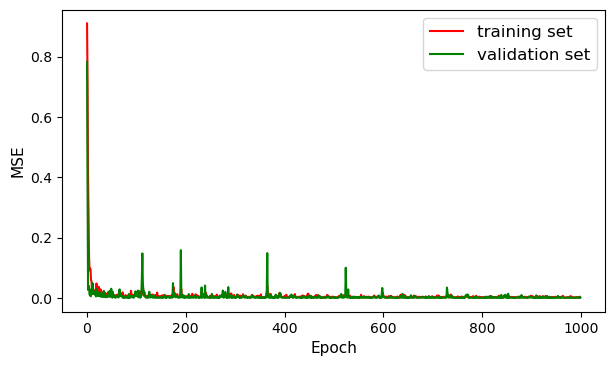

In [11]:
# plt.figure(figsize=(4, 3), dpi=100)
plt.figure(figsize=(7, 4), dpi=100)

plt.plot(model_train.history['loss'], color='r', )
plt.plot(model_train.history['val_loss'], color='g')
plt.ylabel('MSE', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.text(160, 500, '300 epochs', fontsize=12)
# plt.title('FFNN', fontsize=8)
# plt.savefig("loss_dlbinnedJla_.png")

In [12]:
unet = np.sqrt(np.min(model_train.history['val_loss']))
model_train.history['loss'][-1], model_train.history['val_loss'][-1], model_train.history['val_loss'][-2]
# 300 ep (0.5874642133712769, 0.2920302748680115, 0.8262724280357361)
# 500 ep (0.5158745050430298, 1.0162559747695923, 0.4327618181705475)

(0.0015864489832893014, 0.0014607356861233711, 0.0010298916604369879)

In [13]:
# ranz = np.linspace(np.min(z), np.max(z), 31)

# # ranz = np.arange(0.0, 1.5, 0.01)
# ranzz = scalerz.transform(ranz.reshape((-1,1)))

# ranzinv = scalerz.transform(ranz.reshape(-1,1))
ranz = z
# ranzz = ranz
pred_random = neural_model.predict(ranz)
# pred_random
dlfake  = scalerdl.inverse_transform(pred_random.reshape(-1,1))

In [14]:
# fake_data = np.concatenate((z.reshape(-1,1), dl.reshape(-1,1)), axis=1, )
# fake_data = np.stack((ranz, dlfake.reshape(31,)), axis=1)
index = np.argsort(ranz)
fake_data = np.stack((z[index], dlfake.reshape(31,)[index]), axis=1)
# np.savetxt("fake_binned_JLA.dat",  fake_data, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')

In [15]:
dl.reshape(31,)

array([32.95388698, 33.84214074, 34.59344598, 35.25209633, 36.06978761,
       36.65111059, 37.43017325, 38.25325404, 39.06785071, 39.79214362,
       40.56495606, 41.42141744, 42.23146107, 43.05273149, 43.97257341,
       44.82186746, 33.87900347, 34.11856704, 34.93902653, 35.74850165,
       36.43457047, 37.15801411, 37.95661635, 38.61286934, 39.3414019 ,
       40.1565346 , 40.90528778, 41.79092346, 42.61704707, 43.50415083,
       44.51408758])

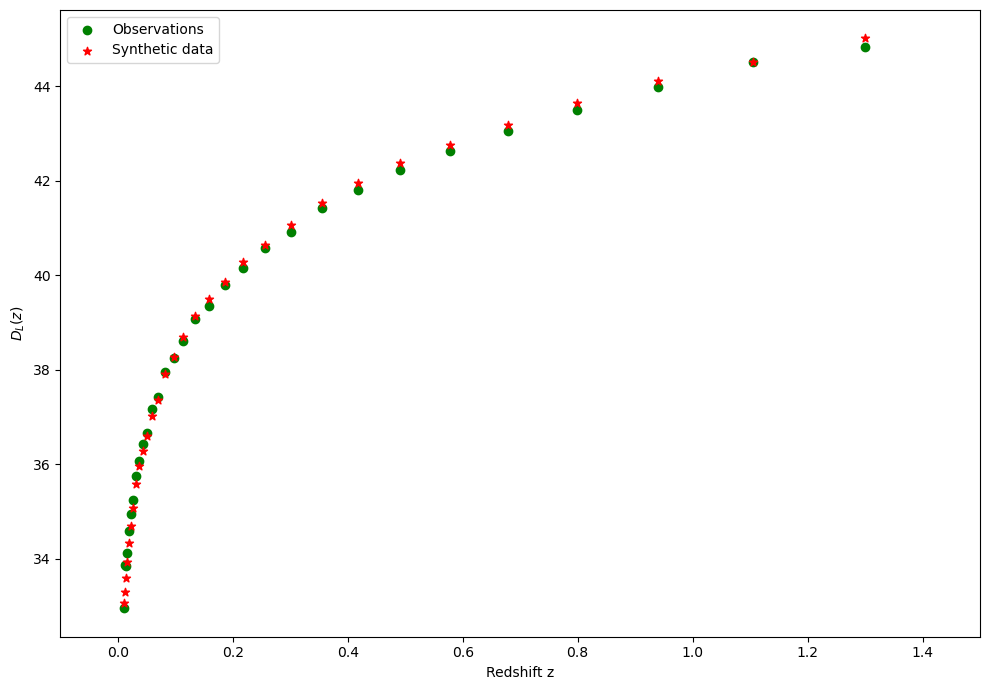

In [16]:
plt.figure(figsize=(10, 7), dpi=100)
plt.scatter(z, dl, c='g', label='Observations')
plt.scatter(ranz, dlfake, c='r', label='Synthetic data', marker='*')
# plt.errorbar(z, dl, yerr=errors, fmt='g.', markersize=10, label='Observations')
# plt.errorbar(ranz, pred_random, 
#              yerr=fakeerrors, fmt='r.', markersize=10., label='Synthetic data with errors')

# plt.plot(z, Hlcdm(z), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
# plt.plot(z, Hlcdm(z, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlabel("Redshift z")
plt.ylabel("$D_L(z)$")
plt.xlim(-0.1, np.max(z)+0.2)
plt.tight_layout()
plt.legend()
# plt.savefig('rec_jla_ffnn.png')

In [17]:
neural_model.save('../models/FFNN_JLA2.h5')